<a href="https://colab.research.google.com/github/yscmrth/Analisis-Multivariat/blob/main/SKRIPSI_PELABELAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
file_path = '/content/drive/My Drive/SKRIPSI/DATASKRIPSITRANSLATED.csv'

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)
data = data.iloc[:, 1:9]
data.head()

Mounted at /content/drive


,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
!pip install Sastrawi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_review(content):
    # Lowercasing
    content = str(content).lower()

    # Menghapus tab, new line, dan back slice
    content = content.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')

    # Menghapus non ASCII (emotikon, karakter Cina, dll.)
    content = content.encode('ascii', 'replace').decode('ascii')

    # Menghapus tanda baca dan menggantinya dengan spasi
    content = re.sub(r'[?|$|%|.|,|!^2_:")(--)"/\']+', ' ', content)

    # Menghapus mention, URL, dan hashtag
    content = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", ' ', content).split())

    # Menghapus angka
    content = re.sub(r"\d+", "", content)

    # Menghapus karakter tunggal (single character)
    content = re.sub(r"\b[a-zA-Z]\b", "", content)

    # Menghapus spasi berlebih
    content = re.sub(r'\s+', ' ', content).strip()

    return content

# Menerapkan fungsi preprocessing
data['translated'] = data['translated'].apply(preprocess_review)

<ipython-input-4-1532a1520d60>:19: FutureWarning: Possible set difference at position 19
  content = re.sub(r'[?|$|%|.|,|!^2_:")(--)"/\']+', ' ', content)


In [ ]:
!pip install VaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Membuat instance SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk melakukan pelabelan sentimen dengan VADER
def analyze_sentiment(compound_score):
    if isinstance(compound_score, float):
        if compound_score < -0.05:
            return 'negatif'
        elif -0.05 <= compound_score <= 0.05:
            return 'netral'
        else:
            return 'positif'
    else:
        return 'unknown'


# Menghitung skor sentimen untuk setiap ulasan
data['compound'] = data['translated'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Melakukan pelabelan sentimen berdasarkan compound_score
data['sentimen'] = data['compound'].apply(analyze_sentiment)
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif
...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif


In [ ]:
# Hitung jumlah data dengan sentimen positif, negatif, dan netral
sentiment_counts = data['sentimen'].value_counts()

# Tampilkan hasil perhitungan
print("Jumlah data dengan sentimen positif:", sentiment_counts['positif'])
print("Jumlah data dengan sentimen negatif:", sentiment_counts['negatif'])
print("Jumlah data dengan sentimen netral:", sentiment_counts['netral'])

Jumlah data dengan sentimen positif: 93904
Jumlah data dengan sentimen negatif: 64674
Jumlah data dengan sentimen netral: 27192


In [ ]:
# Menghapus baris dengan nilai null di kolom dan melakukan reset indeks
data.dropna(subset=['stemmed_text'], inplace=True)
data.reset_index(drop=True, inplace=True)
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif
...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data['stemmed_text']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

9586


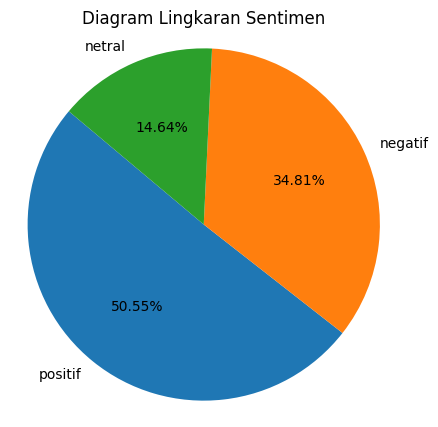

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Anda
s = pd.value_counts(data['sentimen'])

# Membuat diagram lingkaran
plt.figure(figsize=(5, 5))
plt.pie(s, labels=s.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.title('Diagram Lingkaran Sentimen')
plt.show()

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
variable = pd.read_csv('variabelytranslated.csv')
variable

,variabley,variabley_id
0,rapist,pemerkosa
1,raping,pemerkosaan
2,slavery,perbudakan
3,kill,membunuh
4,murder,pembunuhan
...,...,...
3281,warmth,kehangatan
3282,wealthily,dengan kaya
3283,welcome,selamat datang
3284,welcomeness,sambutan


In [ ]:
import pandas as pd

# Buat set dari stopwords
stopwords_set = set(variable['variabley'])

# Buat fungsi untuk memeriksa keberadaan stopwords dalam sebuah kalimat
def contains_stopwords(sentence):
    words = sentence.split()
    return any(word in stopwords_set for word in words)

# Fungsi untuk menghapus kata-kata stopwords dari setiap baris dalam kolom 'variabley'
def remove_response_variable(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'stopwords_en'
data['remove_y'] = data['translated'].apply(remove_response_variable)
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no
...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use


In [ ]:
# Menghapus baris dengan nilai null di kolom 'remove_y' dan melakukan reset indeks
data.dropna(subset=['remove_y'], inplace=True)
data.reset_index(drop=True, inplace=True)
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no
...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use


In [ ]:
# Menghapus baris yang memiliki kata 'enak' dalam kolom 'variabley'
variabel = variable[~variable['variabley_id'].str.contains('enak')]
variabel = variabel[~variabel['variabley_id'].str.contains('payah')]
variabel

,variabley,variabley_id
0,rapist,pemerkosa
1,raping,pemerkosaan
2,slavery,perbudakan
3,kill,membunuh
4,murder,pembunuhan
...,...,...
3281,warmth,kehangatan
3282,wealthily,dengan kaya
3283,welcome,selamat datang
3284,welcomeness,sambutan


In [ ]:
import pandas as pd

# Buat set dari stopwords
stopwords_set = set(variabel['variabley_id'])

# Buat fungsi untuk memeriksa keberadaan stopwords dalam sebuah kalimat
def contains_stopwords(sentence):
    words = sentence.split()
    return any(word in stopwords_set for word in words)

# Fungsi untuk menghapus kata-kata stopwords dari setiap baris dalam kolom 'variabley'
def remove_response_variable(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return ' '.join(filtered_words)

# Terapkan fungsi
data['remove_y_id'] = data['stemmed_text'].apply(remove_response_variable)
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,lambat niat tidak voucher tidak pakai jaring a...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan mantap tolong jual sifat mohon silang ce...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,bantu harga sahabat
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna


In [ ]:
# Menghapus kata 'gratis' secara spesifik
data['remove_y_id'] = data['remove_y_id'].str.replace(r'\bgratis\b', '')

<ipython-input-18-d50454ef3530>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['remove_y_id'] = data['remove_y_id'].str.replace(r'\bgratis\b', '')


In [ ]:
# Menghapus kata 'gratis' secara spesifik
data['remove_y_id'] = data['remove_y_id'].str.replace(r'\bluarbiasa\b', '')

<ipython-input-25-892d4b1a37ae>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['remove_y_id'] = data['remove_y_id'].str.replace(r'\bluarbiasa\b', '')


In [ ]:
# Hitung jumlah data dengan sentimen positif, negatif, dan netral
sentiment_counts = data['sentimen'].value_counts()

# Tampilkan hasil perhitungan
print("Jumlah data dengan sentimen positif:", sentiment_counts['positif'])
print("Jumlah data dengan sentimen negatif:", sentiment_counts['negatif'])
print("Jumlah data dengan sentimen netral:", sentiment_counts['netral'])

Jumlah data dengan sentimen positif: 93904
Jumlah data dengan sentimen negatif: 64674
Jumlah data dengan sentimen netral: 27192


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data['remove_y_id']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))


9262


In [ ]:
# Menghapus record dengan nilai kosong pada kolom 'remove_y_id'
data = data.dropna(subset=['remove_y_id'])
data = data.reset_index(drop=True)

In [ ]:
# Menghapus record dengan nilai kosong pada kolom 'remove_y_id'
data = data.dropna(subset=['remove_y_id'])
data = data.reset_index(drop=True)

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
file_path = '/content/drive/My Drive/SKRIPSI/DATAFIX.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Menghapus record dengan nilai kosong pada kolom 'remove_y_id'
df = df.dropna(subset=['remove_y_id'])
df = df.reset_index(drop=True)

KeyError: ['remove_y_id']

In [ ]:
from collections import Counter

# Menggabungkan semua teks dalam kolom remove_y_id menjadi satu teks panjang
all_text = ' '.join(df['remove_y_id'])

# Memisahkan teks menjadi kata-kata
words = all_text.split()

# Menghitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Menampilkan kata-kata yang hanya muncul sekali
unique_words = [word for word, count in word_counts.items() if count == 1]
print("Kata-kata yang hanya muncul sekali:", unique_words)

Kata-kata yang hanya muncul sekali: ['dtp', 'timpal', 'is', 'silat', 'lidah', 'sekata', 'regresif', 'progresif', 'link', 'bugnyanya', 'teken', 'lejit', 'chace', 'ketidakpercayaan', 'cerpon', 'playing', 'kesitu', 'ls', 'dominan', 'hellloooo', 'julo', 'mungikin', 'disebarluaskan', 'pvc', 'fep', 'diduruh', 'igau', 'playlist', 'rara', 'bkar', 'joo', 'diakes', 'terpikal', 'machett', 'peluk', 'kurs', 'njiiinnnggg', 'akupikir', 'galon', 'hedon', 'bitung', 'manggung', 'perdata', 'kontributif', 'perkosa', 'garnier', 'bandrol', 'bronze', 'kombinasi', 'kiprah', 'alfatex', 'mikir', 'korsleting', 'sendal', 'adira', 'blo', 'inggit', 'begioooo', 'renung', 'debet', 'respect', 'bloatware', 'planning', 'meyenangkan', 'didn', 'butuhin', 'ketul', 'andini', 'atak', 'ramal', 'apaaann', 'boong', 'lalap', 'dokar', 'ckckckkck', 'delete', 'purnajual', 'cancelkan', 'buar', 'kiat', 'alfatrex', 'leher', 'expres', 'smartphone', 'relokasi', 'peleh', 'overall', 'barudakk', 'burus', 'logaritma', 'cipanas', 'angkor', '

In [ ]:
import pandas as pd

# Membuat DataFrame dari unique_words
df_unique_words = pd.DataFrame(unique_words, columns=['Unique Words'])


In [ ]:
# Daftar kata yang ingin dihapus
kata_yang_dihapus = ['timpal', 'silat', 'lidah','regresif','progresif','link',
                     'ketidakpercayaan','dominan','disebarluaskan','terpikal',
                     'peluk', 'kurs','galon', 'hedon', 'perdata','garnier',
                     'bronze','kombinasi','logaritma','visual','siklus',
                     'sendok','garpu','properti','responden','belibarang','kepalang'
                     'kumis','reka','telfon','spontan','ketimbang','lion','update',
                     'purworejo','silinder','mars','futsal','syahdu','driverfoods',
                     'revolusi','jalar','transformasi','deterjen','termos','bendahara',
                     'curhat','obsesi','semboyan','radikal','radikalisme','sepak'
                     'jajak','adjusment','mindset','ranjau','jilat','universal',
                     'getar','isolasi','pahat','kelontong','dongkrak','prank',
                     'antv','akut','bandeng','superior','aktivasikan','magnet',
                     'bidan','belulang','sorot','tewas','fleksibilitas','selaras',
                     'reload','makro','reda','rangkai','bidadari','cemooh','susut',
                     'brilink','jambore','hanyut','ubi','apresiasif','jdid',
                     'serong','ombak','tongkrong','bantai','lembab','tremor',
                     'anggrek','karakteristik','adaptif','parno','pitam',
                     'merinding','stadium','matematika','cicip','birthdaysale',
                     'webtoon','kronologis','gaun','angsa','communications','play',
                     'jamban','vaksin','baur','obsesif','antareja','sebelas',
                     'syur','kompresi','arab','keramat','foya','pena','palangkaraya',
                     'jomlo','gagak','presentasi','yahoo','sinergi','begal',
                     'fakir','kontra','canva','gopaypaylater','lancarjaya',
                     'kuliner','karbon','perih','dimensi','india','katasandi',
                     'aksen','hektar','konsultan','panjat','huni','pepatah',
                     'pikat','tunggal','magiccom','implementasi','ambisi',
                     'sangkal','hardcase','gadis','parabola','santa','rangkum',
                     'statistik','korek','benang','gunting','orientasi',
                     'tampang','samosir','kapak','metro','narkoba','klausul',
                     'terdistraksi','jalin','webinar','tegak','rotasi','reptil',
                     'sosialisasi','ketan','ramping','taruma','validitas',
                     'autofill','bungkam','waswas','merchant','paha','fiksi',
                     'kelapa','flu','siul','terjang','hakiki','hujat','binder',
                     'evakuasi','purwokerto','kapital','suit','suit','budi',
                     'polo','bolos','moral','tugu','absah','kronis','lumat',
                     'watching','himbau','baturaja','mineral','cup','mineral',
                     'bioskop','tarawih','asin','aktris','ceplas','ceplos',
                     'cadar','apply','obeng','kupu','hoodie','bersin',
                     'muara','membantuh','berwirausaha','plot','dokumentasi',
                     'processing','keran','bakmie','bilamana','kuah',
                     'duyung','lensa','tumbang','latin','bagussya','amanda',
                     'return','refund','hara','ria','zaitun','polusi','anniversary',
                     'ambasador','brebes','tebas','jungkir','domisi','dialog',
                     'kandidat','melipatgandakan','processing','polytron','ganjil',
                     'ganjil','nelayan','gendong','nomorsatukan','spidometer',
                     'unilever','pukau','spidometer','noticed','rental',
                     'utus','risih','akusisi', 'interval','siswa','siswi',
                     'bilingual','lord','semarak','ghosting','piawai',
                     'cudak','odol','akur','komparasi','advan','kuda','komentator',
                     'serobot','sanak','milenium','cium','bantul','distro','pijat',
                     'barsaing','liur','darmawan','pake','banjarbaru',
                     'simbiosis','mutualisme','adminitrasinya','tikam',
                     'senyap','kreasi','kkv','liver','memuaskankan','junior',
                     'roboh','domestik','kubus','akuarium','edukatif',
                     'menundaa','mangsa','arloji','muslimah','kerbau',
                     'tambak','tomat','karunia','sisip','tur','taiwan',
                     'wiraswasta','oven','lamasekali','inflasi','tungku',
                     'ipad','gabus','tambun','aura','problema','hirup',
                     'balon','rontok','bantal','tabel','meteorologi','klimatologi',
                     'geofisika','lugas','asasi','zara','heels','militer',
                     'trjangkau','saut','fiturnya','almond','burger',
                     'durian','sakti','kemiri','mudik','segenap','sari','sim',
                     'ciut','ulung','sabuk','literasi','akuisisi','jiplak',
                     'melati','mataram','editor','jenius','toner','tulip',
                     'ternak','krayon','agresif','intensitas','obesitas',
                     'tolerir','bambu','punjung','blouse','stamina',
                     'eksistensi','antigores','ekspresi','monitor','denim',
                     'siasat','gempor','luwes','bio','observasi','kilir',
                     'utas','loket','sandiwara','terapi','suplai','marvel',
                     'arwah','koma','ironis','simulator','eropa','ensiklopedia',
                     'gelincir','nyamuk','disabilitas','rumput','provokasi',
                     'debitur','vakum','debu','satelit','asisten',
                     'ketidaksesuaian','rentang','kikis','transisi','kerangka',
                     'arsip','mukjizat','pincang','ambigu','suvenir','youtuber',
                     'konsolidasi','instastory','mancanegara','abadi','sunscreen',
                     'piramida','biodata','picsart','katarak','arogansi','intern',
                     'derajat','jelata','fasih','royalti','perkakas','prabowo',
                     'gamblang','narasi','pesantren','mysmartfren','hvs',
                     'ganas','telapak','delman','antartika','jepara','lalang',
                     'kekal','salju','pakta','sambar','mad','katak','keladi',
                     'culik', 'pintas', 'berleha', 'mutakhir','rampung','sangkar',
                     'tambang', 'ekspansi', 'patrol','luka','kontinu','aksara',
                     'stroke','modul','investor','paman','wetv','rambat', 'jelih',
                     'universitas','googleplaystore','representatif','apoteker','siaga',
                     'buluk','skrip','pratama','kolega','supir','sedat','produktivitas',
                     'berterimakasih','omega','brilian','tusuk','kusam','cerai',
                     'multitasking','poster','luap','tunas','kecimpung',
                     'belukar','pinang','garing','geletak','nasehat','kancah',
                     'wirausaha','hajar','maslahat','cuit','intens','fit','minahasa',
                     'adaptasi','lebur','jas','hotwheels','bubur','nuansa',
                     'sensual','loyang','jpg','distraksi','dewan','eksploitasi',
                     'baku','tanjak','partai','irama','cekal','karamel','bersosialita',
                     'bersosialita','bersosialita','kabut','pengindentifikasian',
                     'simbol','tawang','mapan','malfungsi','jambret','kerinci',
                     'gelisah','sedak','serat','rajut','tambal','pustaka','potret',
                     'balok','ronta','komputerisasi','fresh','lantang',
                     'kutuk','polaritas','makeup','luck','rasuk','tunduk',
                     'ginseng','takjub','lentera','kokoh','formal','gerah',
                     'gimnastik','kolesterol','intonasi','viralkan','lahap',
                     'susila','asumsi','pundung','asah','tekun','tekun',
                     'cempaka','geometri','spiritual','singgah','juragan',
                     'lembur','diatasnamakan','erotis','energik','penat','liga',
                     'dangdut','gayung','selat','interior','semi','mengeksplor',
                     'informan','labu','pusar','individu','libas','interupsi',
                     'guntur','miniso','mitos','handycam','sony','redaksi',
                     'obral','frezee','tenda','pinggang','pasien','puskesmas',
                     'modernisasi','lumajang','afektif','tiang','sembari',
                     'komedi','dedikasi','rundung','terik','industri','sepuh',
                     'eksperimen','impas','melodi','ketua','hotline','perspektif',
                     'cetus','dominasi','sportifitas','harmonis','khayal','lenovo',
                     'afrika','lamar','combo','lentur','tersier','avanza','risau',
                     'gopaylater','diskriminatif','cod','tegap','lunar','pundak',
                     'lorong','refleks','produser','konverter','petang',
                     'menyutujui','kalkulator','bangsawan','seragam',
                     'tindih','cidera','cacah','campak','mangkok','setrika',
                     'vital','jerit','intip','gurun','ikonik','runding',
                     'kelopak','lalulintas','antena','ciduk','karat',
                     'frekuensi','manipulatif','akad','disfungsi','deposito',
                     'prostitusi','karap','sad','sembah','fana','konsumtif',
                     'pegal','aspirasi','ulama','list','niscaya','sejuk',
                     'lengah','ketidaksengajaan','senjang','identifikasi',
                     'peluru','topan','medis','paten','esa', 'ketulungan',
                     'presdir', 'aksara', 'patrol', 'mbps','jenjang','sangkar',
                     'pizza','kepak','anjak','berleha','rampung','kontinu','stroke',
                     'beber','paman','wetv', 'universitas','googleplaystore',
                     'representatif','apoteker','aduk','siaga','dukun','buluk',
                     'letus','skrip','laskar','kolega','apotek','lahan','anulir',
                     'benalu','produktivitas','dakwah','berterimakasih','omega',
                     'dandan','deret','brilian','kusam','cerai','colorfit',
                     'multimedia','kasbon','tawang','jerman','ceklis',
                     'pengindentifikasian','paragon','kabut','farmasi','cendol',
                     'dinosaurus','karamel','kuadrat','irama','partai','babu',
                     'ciamis','malfungsi','bromo','mangga','gelisah','sedak',
                     'tambal','rajut','pustaka','potret','modis','terror',
                     'jenazah','cempreng','komputerisasi','civil','lantang',
                     'kutuk','polaritas','satin','formal','tepi','takjub',
                     'ukulele','senar','rasuk','kokoh','lentera','cekung',
                     'asah','nabi','asumsi','basket','labrak','progress',
                     'jinak', 'lahap','viralkan','intonasi','cincang','surut',
                     'kolesterol','gimnastik','surut','mengeksplor','intervensi',
                     'tekun','girang','tupai','panutan','geometri','spiritual',
                     'singgah','penat','gayung','adzan','interior','selat',
                     'informan', 'pusar','labu', 'miniso', 'mitos', 'tanjung',
                     'pandan', 'obral', 'rekrutmen','legalitas','rebus',
                     'gelintir', 'rundung', 'komedi','gembok','sembari','tiang',
                     'selempang','bingkai','lengkung','modernisasi','rakat',
                     'pinggang', 'tenda', 'rayap','transmart', 'apartemen',
                     'semen','dominasi','pancasila','hotline','gitar',
                     'tuang', 'ketua','cicit','gapai','impas','eksperimen',
                     'aset', 'pentas','legenda','tersier','bangkang','lentur',
                     'combo', 'inova','toyota','afrika', 'lenovo','diabetes',
                     'senam', 'leyeh', 'ungkit','lumpuh','gosok', 'firus', 'santap',
                     'troli','gerus','sel', 'yasin', 'desah', 'catut','bujur','usik',
                     'football', 'dinkes', 'keset', 'risau', 'gopaylater','manca','pundak',
                     'saudi', 'tegap', 'lunar', 'arabia','embal','alim','tengkulak','bentur',
                     'refleks', 'kong', 'kalikong', 'produser', 'invasif', 'konverter',
                     'petang', 'believe','buduk','stempel','setra','mangkal','deposito',
                     'akad', 'lakban', 'prostitusi', 'disfungsi', 'karap', 'manipulatif',
                     'pecal', 'ciduk', 'rangkak', 'tindih', 'satir', 'nip', 'cidera',
                     'campak', 'usahawan', 'vital', 'jerit', 'gurun', 'ikonik',
                     'takluk','runding','timun','kelopak','lalulintas','martabak',
                     'ciduk','pecal','wattpad','manipulatif','lembang','senjang',
                     'ketidaksengajaan', 'dahang', 'firman', 'sejuk', 'cerutu',
                     'niscaya','lengah', 'ulama', 'list','aspirasi','pegal',
                     'kafe', 'sembah','sembah', 'piano', 'lawang', 'tenteram',
                     'cineprime', 'cineprime', 'kelahi', 'topan', 'terpecaya',
                     'ketawa', 'medis', 'berkahlaris', 'berlanggaan', 'redownload',
                     'ditokopedia', 'esa','niscaya', 'cerutu', 'selonjor','sejuk',
                     'entong', 'call', 'dahang','nancap', 'hawa', 'kapak', 'samosir',
                     'gambir', 'keliar','indon', 'dadang', 'contohin', 'kompilasi',
                     'bubung', 'dalang', 'tampang', 'lego', 'benang', 'parabola',
                     'santa','statistik','getar','getar',  'jilat', 'universal',
                     'cincau', 'otomatik', 'cincau','takdir', 'piooner', 'mindset',
                     'ranjau','sepak', 'jajak', 'lesuh', 'sedan', 'riweh', 'tameng',
                     'pasir', 'obsesi', 'orisinil', 'curhat', 'broker', 'jalar','futsal',
                     'syahdu', 'semboyan', 'kentong', 'revolusi', 'deterjen','jalar',
                     'bendahara', 'kandas', 'broker', 'curhat', 'orisinil',
                     'jajak', 'tangkal', 'imlek','adjusment','makro','reload'  ]

# Melakukan iterasi pada setiap kata yang ingin dihapus
for word in kata_yang_dihapus:
    # Menghapus kata dari unique_words jika kata tersebut ada di dalamnya
    if word in unique_words:
        unique_words.remove(word)

unique_words

['dtp',
 'is',
 'sekata',
 'bugnyanya',
 'teken',
 'lejit',
 'chace',
 'cerpon',
 'playing',
 'kesitu',
 'ls',
 'hellloooo',
 'julo',
 'mungikin',
 'pvc',
 'fep',
 'diduruh',
 'igau',
 'playlist',
 'rara',
 'bkar',
 'joo',
 'diakes',
 'machett',
 'njiiinnnggg',
 'akupikir',
 'bitung',
 'manggung',
 'kontributif',
 'perkosa',
 'bandrol',
 'kiprah',
 'alfatex',
 'mikir',
 'korsleting',
 'sendal',
 'adira',
 'blo',
 'inggit',
 'begioooo',
 'renung',
 'debet',
 'respect',
 'bloatware',
 'planning',
 'meyenangkan',
 'didn',
 'butuhin',
 'ketul',
 'andini',
 'atak',
 'ramal',
 'apaaann',
 'boong',
 'lalap',
 'dokar',
 'ckckckkck',
 'delete',
 'purnajual',
 'cancelkan',
 'buar',
 'kiat',
 'alfatrex',
 'leher',
 'expres',
 'smartphone',
 'relokasi',
 'peleh',
 'overall',
 'barudakk',
 'burus',
 'cipanas',
 'angkor',
 'bangetbpoko',
 'dps',
 'mahalab',
 'pelak',
 'galagi',
 'expresmu',
 'avalibe',
 'atasnama',
 'duitin',
 'abidzar',
 'algifari',
 'dimaximalin',
 'memperolehbarang',
 'nntuk',
 '

In [ ]:
import pandas as pd

# Membuat DataFrame dari unique_words
df_unique_words = pd.DataFrame(unique_words, columns=['Unique Words'])


In [ ]:
df_unique_words

,Unique Words
0,dtp
1,is
2,sekata
3,bugnyanya
4,teken
...,...
2999,sesai
3000,ker
3001,bod
3002,buos


In [ ]:
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,lambat niat tidak voucher tidak pakai jaring a...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna


In [ ]:
# Membuat data baru dengan menghapus kata-kata yang ingin dihapus
data_baru = data.copy()  # Buat salinan DataFrame data
for word in unique_words:
    data_baru['remove_y_id'] = data_baru['remove_y_id'].str.replace(r'\b{}\b'.format(word), '')  # Hapus kata dari setiap baris

# Menampilkan data baru setelah penghapusan kata-kata yang ingin dihapus
print(data_baru.head())

<ipython-input-43-79bb18c40ea3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_baru['remove_y_id'] = data_baru['remove_y_id'].str.replace(r'\b{}\b'.format(word), '')  # Hapus kata dari setiap baris


          userName                                            content  \
0       Ayu Rahayu  Shopee makin ksni makin lemot niat gk sih ngas...   
1       Kadar Tono  Pelayanan di Shopee mantap, tapi tolong seller...   
2         Hasbi Mr  Akun spay letter dinonaktifkan. Alasan perbeda...   
3  Yoan Indah Yani          Sangat membantu dan harga juga bersahabat   
4    Nisha Mahfudz  Makin kesini makin kesana, makin2 pelit makin2...   

                                        data_cleaned  \
0  shopee makin ksni makin lemot niat gk sih ngas...   
1  pelayanan di shopee mantap tapi tolong seller ...   
2  akun spay letter dinonaktifkan alasan perbedaa...   
3          sangat membantu dan harga juga bersahabat   
4  makin kesini makin kesana makin pelit makin er...   

                                         formal_text  \
0  shopee semakin ke sini semakin lambat niat tid...   
1  pelayanan di shopee mantap tapi tolong penjual...   
2  akun shopeepay later dinonaktifkan alasan perb...   


In [ ]:
# Menghapus record dengan nilai kosong pada kolom 'remove_y_id'
data_baru = data_baru.dropna(subset=['remove_y'])
data_baru = data_baru.reset_index(drop=True)

In [ ]:
data_baru['remove_y_id'] = data_baru['remove_y_id'].str.replace(r'\blambanbanget\b', '')

<ipython-input-52-e953f3fd856d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_baru['remove_y_id'] = data_baru['remove_y_id'].str.replace(r'\blambanbanget\b', '')


In [ ]:
data_baru

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,niat tidak voucher tidak pakai jaring awas ti...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna


In [ ]:
# Menghapus baris dengan nilai null di kolom 'remove_y' dan melakukan reset indeks
data_baru.dropna(subset=['remove_y_id'], inplace=True)
data_baru.reset_index(drop=True, inplace=True)
data_baru

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,niat tidak voucher tidak pakai jaring awas ti...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data_baru['remove_y_id']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

cv.transform(Ulasan)


6327


In [ ]:
from google.colab import files

# Simpan DataFrame sebagai file CSV
data_baru.to_csv('SKRIPSI_DATA.csv', index=False)

# Download file CSV ke perangkat lokal
files.download('SKRIPSI_DATA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
file_path = '/content/drive/My Drive/SKRIPSI/SKRIPSI_DATA.csv'

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,niat tidak voucher tidak pakai jaring awas ti...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
185765,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat
185766,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...
185767,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon
185768,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download nltk resources jika belum diinstal
nltk.download('punkt')

# Tokenisasi setiap kalimat dalam kolom 'stemmed_text'
data['stemmed_token'] = data['stemmed_text'].apply(lambda x: word_tokenize(x))

# Tampilkan hasil tokenisasi
print(data['tokenized_text'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0         ['shopee', 'semakin', 'ke', 'sini', 'semakin',...
1         ['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...
2         ['akun', 'shopeepay', 'later', 'dinonaktifkan'...
3         ['sangat', 'membantu', 'dan', 'harga', 'juga',...
4         ['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...
                                ...                        
185765    ['murah', 'dan', 'cepat', 'sangat', 'sampai', ...
185766    ['koin', 'shopee', 'ribu', 'ketika', 'check', ...
185767           ['mengganggu', 'proses', 'ber', 'telepon']
185768                 ['sangat', 'mudah', 'di', 'gunakan']
185769    ['aplikasi', 'yang', 'bagus', 'sangat', 'memba...
Name: tokenized_text, Length: 185770, dtype: object


In [ ]:
data

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id,stemmed_token
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,niat tidak voucher tidak pakai jaring awas ti...,"[lambat, niat, tidak, voucher, tidak, pakai, j..."
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...,"[layan, mantap, tolong, jual, sifat, kecewa, m..."
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...,"[akun, shopeepay, later, nonaktif, alas, beda,..."
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga,"[bantu, harga, sahabat]"
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak,"[pelit, eror, tidak, jelas]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182445,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat,"[murah, cepat]"
182446,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...,"[koin, ribu, check, kaget, sisa, ribu, obrol, ..."
182447,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon,"[ganggu, proses, telepon]"
182448,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna,"[mudah, guna]"


In [ ]:
# Cek apakah terdapat kata "masalah" dalam kolom tokenized_text
data['has_masalah'] = data['tokenized_text'].apply(lambda x: 'masalah' in x)

# Menambahkan kata "masalah" pada kolom stopword_removed dan stemmed_text
data['stopword_removed'] = data.apply(lambda row: row['stopword_removed'] + ' masalah' if row['has_masalah'] else row['stopword_removed'], axis=1)
data['stemmed_text'] = data.apply(lambda row: row['stemmed_text'] + ' masalah' if row['has_masalah'] else row['stemmed_text'], axis=1)

# Tampilkan beberapa baris pertama data setelah penambahan kata "masalah"
print(data.head())


          userName                                            content  \
0       Ayu Rahayu  Shopee makin ksni makin lemot niat gk sih ngas...   
1       Kadar Tono  Pelayanan di Shopee mantap, tapi tolong seller...   
2         Hasbi Mr  Akun spay letter dinonaktifkan. Alasan perbeda...   
3  Yoan Indah Yani          Sangat membantu dan harga juga bersahabat   
4    Nisha Mahfudz  Makin kesini makin kesana, makin2 pelit makin2...   

                                        data_cleaned  \
0  shopee makin ksni makin lemot niat gk sih ngas...   
1  pelayanan di shopee mantap tapi tolong seller ...   
2  akun spay letter dinonaktifkan alasan perbedaa...   
3          sangat membantu dan harga juga bersahabat   
4  makin kesini makin kesana makin pelit makin er...   

                                         formal_text  \
0  shopee semakin ke sini semakin lambat niat tid...   
1  pelayanan di shopee mantap tapi tolong penjual...   
2  akun shopeepay later dinonaktifkan alasan perb...   


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download nltk resources jika belum diinstal
nltk.download('punkt')

# Tokenisasi setiap kalimat dalam kolom 'stemmed_text'
data['stemmed_token'] = data['stemmed_text'].apply(lambda x: word_tokenize(x))

# Tampilkan hasil tokenisasi
print(data['stemmed_token'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0         [lambat, niat, tidak, voucher, tidak, pakai, j...
1         [layan, mantap, tolong, jual, sifat, kecewa, m...
2         [akun, shopeepay, later, nonaktif, alas, beda,...
3                                   [bantu, harga, sahabat]
4                               [pelit, eror, tidak, jelas]
                                ...                        
185765                                       [murah, cepat]
185766    [koin, ribu, check, kaget, sisa, ribu, obrol, ...
185767                            [ganggu, proses, telepon]
185768                                        [mudah, guna]
185769                             [aplikasi, bagus, bantu]
Name: stemmed_token, Length: 185770, dtype: object


In [ ]:
import pandas as pd

# Simpan kolom 'tokenized_text' ke dalam file CSV
data.to_csv('datastemmedberupatoken.csv', index=False)

print("Kolom 'tokenized_text' telah disimpan dalam file 'tokenized_text.csv'")


Kolom 'tokenized_text' telah disimpan dalam file 'tokenized_text.csv'


In [ ]:
data['stemmed_token'].to_csv('stemmed_token.csv', index=False)

In [ ]:
# Menghapus baris dengan nilai null di kolom 'remove_y' dan melakukan reset indeks
data.dropna(subset=['remove_y_id'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
# Hitung jumlah data dengan sentimen positif, negatif, dan netral
sentiment_counts = data['sentimen'].value_counts()

# Tampilkan hasil perhitungan
print("Jumlah data dengan sentimen positif:", sentiment_counts['positif'])
print("Jumlah data dengan sentimen negatif:", sentiment_counts['negatif'])
print("Jumlah data dengan sentimen netral:", sentiment_counts['netral'])

Jumlah data dengan sentimen positif: 91635
Jumlah data dengan sentimen negatif: 64046
Jumlah data dengan sentimen netral: 26769


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data['remove_y_id']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

6327


In [ ]:
term_fit.vocabulary_

{'niat': 4275,
 'tidak': 5952,
 'voucher': 6251,
 'pakai': 4526,
 'jaring': 2749,
 'awas': 486,
 'tinggal': 5983,
 'online': 4468,
 'shop': 5502,
 'layan': 3574,
 'tolong': 6015,
 'jual': 2844,
 'sifat': 5522,
 'mohon': 4140,
 'silang': 5533,
 'cek': 1247,
 'terima': 5917,
 'kasih': 3002,
 'moga': 4138,
 'maju': 3833,
 'akun': 147,
 'shopeepay': 5507,
 'later': 3562,
 'nonaktif': 4331,
 'alas': 167,
 'beda': 730,
 'data': 1575,
 'belanja': 759,
 'rajin': 4983,
 'tunai': 6091,
 'bayar': 713,
 'cicil': 1331,
 'video': 6236,
 'tarik': 5801,
 'uang': 6122,
 'duit': 1832,
 'kurang': 3447,
 'masuk': 3943,
 'sistem': 5572,
 'bukan': 1117,
 'ikut': 2509,
 'payah': 4622,
 'orang': 4483,
 'kembali': 3094,
 'harga': 2364,
 'pelit': 4651,
 'eror': 1949,
 'filter': 2018,
 'lokasi': 3733,
 'pilih': 4768,
 'jakarta': 2711,
 'barat': 665,
 'enak': 1927,
 'pesan': 4740,
 'spx': 5634,
 'hubung': 2458,
 'customer': 1481,
 'service': 5485,
 'baru': 675,
 'guna': 2283,
 'beli': 772,
 'barang': 660,
 'ingin

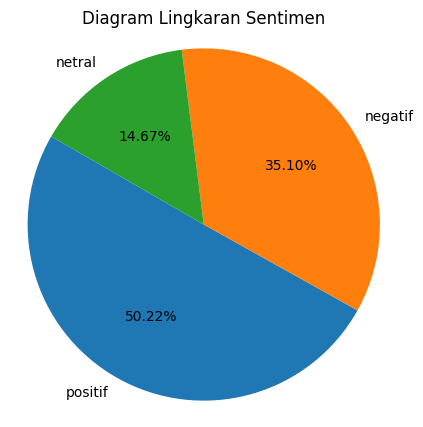

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Anda
s = pd.value_counts(data['sentimen'])

# Membuat diagram lingkaran
plt.figure(figsize=(5, 5))
plt.pie(s, labels=s.index, autopct='%1.2f%%', startangle=150)
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.title('Diagram Lingkaran Sentimen')
plt.show()

PEMBOBOTAN


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data['remove_y_id']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

6325


In [ ]:
data

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id,stemmed_token,has_masalah
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.6384,negatif,intention no voucher no used network caution m...,niat tidak voucher tidak pakai jaring awas ti...,"[lambat, niat, tidak, voucher, tidak, pakai, j...",True
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...,"[layan, mantap, tolong, jual, sifat, kecewa, m...",False
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...,"[akun, shopeepay, later, nonaktif, alas, beda,...",False
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga,"[bantu, harga, sahabat]",False
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no,-0.7351,negatif,stingy with errors no,pelit eror tidak,"[pelit, eror, tidak, jelas]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182445,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat,"[murah, cepat]",False
182446,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.1769,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...,"[koin, ribu, check, kaget, sisa, ribu, obrol, ...",False
182447,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon,"[ganggu, proses, telepon]",False
182448,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna,"[mudah, guna]",False


Jumlah data dengan sentimen positif: 91635
Jumlah data dengan sentimen negatif: 64046
Jumlah data dengan sentimen netral: 26769


In [ ]:
data['remove_y_id'] = data['remove_y_id'].str.replace(r'\bbukan\b', '')

<ipython-input-5-850e2ed8fe8a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['remove_y_id'] = data['remove_y_id'].str.replace(r'\bbukan\b', '')


In [ ]:
data['remove_y_id'] = data['remove_y_id'].str.replace(r'\btidak\b', '')

<ipython-input-6-cb17a22d5fc3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['remove_y_id'] = data['remove_y_id'].str.replace(r'\btidak\b', '')


In [ ]:
# Hitung jumlah data dengan sentimen positif, negatif, dan netral
sentiment_counts = data['sentimen'].value_counts()

# Tampilkan hasil perhitungan
print("Jumlah data dengan sentimen positif:", sentiment_counts['positif'])
print("Jumlah data dengan sentimen negatif:", sentiment_counts['negatif'])
print("Jumlah data dengan sentimen netral:", sentiment_counts['netral'])

Jumlah data dengan sentimen positif: 91635
Jumlah data dengan sentimen negatif: 64046
Jumlah data dengan sentimen netral: 26769


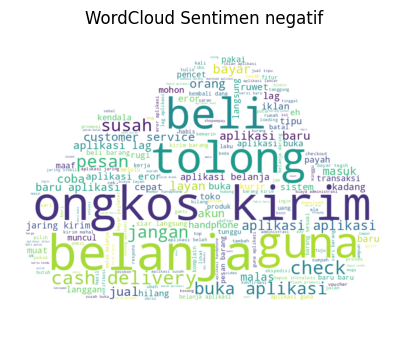

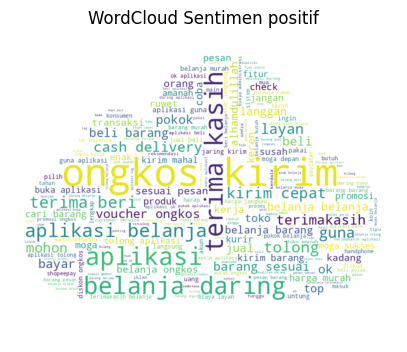

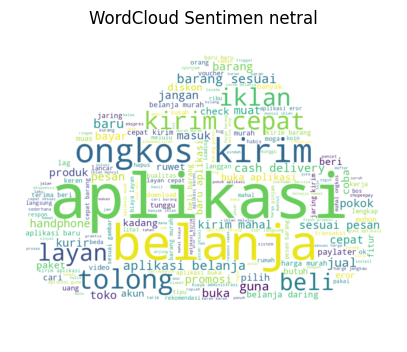

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Fungsi untuk membuat WordCloud
def generate_wordcloud(text, title):
    # Membuat mask berbentuk hati
    mask = np.array(Image.open("cloud.png"))

    # Membuat objek WordCloud dengan mask
    wordcloud = WordCloud(width=800, height=800, background_color="white", mask=mask).generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat WordCloud untuk setiap kategori sentimen
for sentimen in data['sentimen'].unique():
    filtered_text = ' '.join(data[data['sentimen'] == sentimen]['remove_y_id'])
    generate_wordcloud(filtered_text, f'WordCloud Sentimen {sentimen}')

In [ ]:
from collections import Counter

# Dictionary untuk menyimpan kata-kata teratas untuk setiap label
top_words_by_label = {}

# Menghitung frekuensi kemunculan kata-kata untuk setiap label
for sentimen in data['sentimen'].unique():
    filtered_text = ' '.join(data[data['sentimen'] == sentimen]['remove_y_id'])
    words = filtered_text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(30)
    top_words_by_label[sentimen] = top_words

# Menampilkan kata-kata teratas untuk setiap label
for sentimen, top_words in top_words_by_label.items():
    print(f"Top 30 kata untuk label '{sentimen}':")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print()

Top 30 kata untuk label 'negatif':
aplikasi: 24169
kirim: 9223
barang: 7692
baru: 7608
belanja: 6652
buka: 6130
bayar: 6009
pesan: 4800
beli: 4694
eror: 4640
jual: 4615
guna: 4356
akun: 4280
lag: 4271
susah: 4122
paylater: 3949
jaring: 3808
tolong: 3646
iklan: 3529
handphone: 3414
masuk: 3195
toko: 2828
tipu: 2730
video: 2617
hapus: 2552
paket: 2540
ongkos: 2512
login: 2425
kurir: 2336
muat: 2302

Top 30 kata untuk label 'positif':
belanja: 23809
aplikasi: 22245
kirim: 18455
barang: 12677
ongkos: 11984
tolong: 8140
terima: 7019
beli: 6207
cepat: 6154
moga: 5560
ok: 5315
layan: 5038
daring: 4969
jual: 4577
guna: 4364
pesan: 4154
murah: 4100
kasih: 4008
sesuai: 3863
toko: 3751
beri: 3678
terimakasih: 3646
harga: 3558
pokok: 3312
biaya: 3095
baru: 2954
bayar: 2949
voucher: 2870
jaring: 2866
butuh: 2775

Top 30 kata untuk label 'netral':
aplikasi: 6148
belanja: 3616
kirim: 3315
barang: 2622
cepat: 2048
baru: 1693
sesuai: 1344
pesan: 1234
iklan: 1207
murah: 1179
ongkos: 1080
beli: 1074
laya

WordCloud untuk label 'negatif':


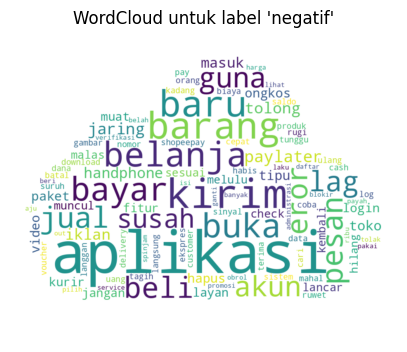

WordCloud untuk label 'positif':


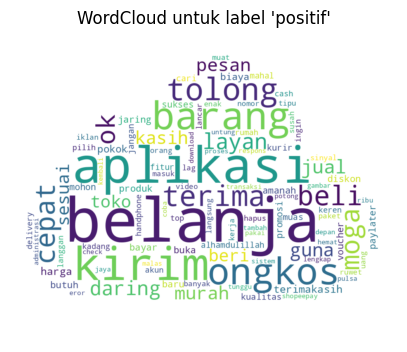

WordCloud untuk label 'netral':


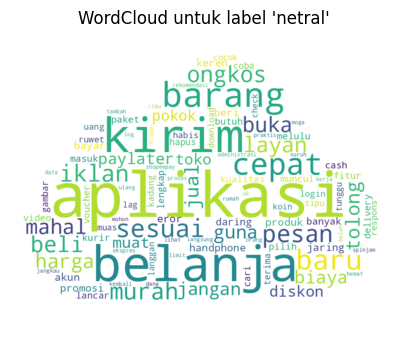

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Dictionary untuk menyimpan kata-kata teratas untuk setiap label
top_words_by_label = {}

# Menghitung frekuensi kemunculan kata-kata untuk setiap label
for sentimen in data['sentimen'].unique():
    filtered_text = ' '.join(data[data['sentimen'] == sentimen]['remove_y_id'])
    words = filtered_text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(100)
    top_words_by_label[sentimen] = top_words

# Fungsi untuk membuat WordCloud dari kata-kata teratas dengan gambar sebagai mask
def generate_wordcloud_with_mask(words_freq, mask_image_path, title):
    # Membaca gambar mask
    mask = np.array(Image.open(mask_image_path))

    # Membuat WordCloud dengan menggunakan gambar mask
    wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask).generate_from_frequencies(dict(words_freq))

    # Menampilkan WordCloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Lokasi gambar mask
mask_image_path = "cloud.png"

# Menggunakan gambar sebagai mask untuk WordCloud
for sentimen, top_words in top_words_by_label.items():
    print(f"WordCloud untuk label '{sentimen}':")
    generate_wordcloud_with_mask(dict(top_words), mask_image_path, f'WordCloud untuk label \'{sentimen}\'')

**PEMBOBOTAN**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data['remove_y_id']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

6325


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import Sequence
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_ffnn = '/content/drive/My Drive/models/modelFFNN.h5'

# Define ModelCheckpoint callback to save the best model to Google Drive
checkpoint_ffnn = ModelCheckpoint(filepath_ffnn, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define batch size
batch_size = 64

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y

# Pra-pemrosesan data
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_tfidf = tfidf_vectorizer.fit_transform(data['remove_y_id'])

# Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentimen'], test_size=0.2, random_state=42)

# Ubah TF-IDF sparse matrix menjadi dense array
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

# Membuat instance dari DataGenerator untuk data pelatihan
train_generator = DataGenerator(X_train_array, pd.get_dummies(y_train), batch_size)

# Membuat instance dari DataGenerator untuk data validasi
validation_generator = DataGenerator(X_test_array, pd.get_dummies(y_test), batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mendapatkan indeks baris dari X_train
indeks_train = X_train.indices

# Menampilkan data ulasan yang termasuk dalam X_train
data_ulasan_train = data.iloc[indeks_train]

# Menampilkan data ulasan yang termasuk dalam X_train
data_ulasan_train

,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
759,Cicik Setya,Sering dapet gratis ongkir sama cashback,sering dapet gratis ongkir sama cashback,sering dapat gratis ongkos kirim sama cashback,"['sering', 'dapat', 'gratis', 'ongkos', 'kirim...","['gratis', 'ongkos', 'kirim', 'cashback']",gratis ongkos kirim cashback,free shipping cashback,0.5106,positif,shipping cashback,ongkos kirim cashback
596,Kirana Syakila,Aplikasi Shopee sekarang lemod. Loading nya lama,aplikasi shopee sekarang lemod loading nya lama,aplikasi shopee sekarang lambat muatan nya lama,"['aplikasi', 'shopee', 'sekarang', 'lambat', '...","['aplikasi', 'lambat', 'muatan']",aplikasi lambat muat,the application is sluggish to load,-0.4019,negatif,the application is to load,aplikasi muat
4897,Hoed Ballada,Cuma loading nya agak lelet bos,cuma loading nya agak lelet bos,cuma muatan nya agak lambat bos,"['cuma', 'muatan', 'nya', 'agak', 'lambat', 'b...","['muatan', 'lambat', 'bos']",muat lambat bos,sluggish loading boss,-0.4019,negatif,loading boss,muat bos
5199,Diah Evi,"Sangat suka belanja pake shopee,mudah gak ribe...",sangat suka belanja pake shopee mudah gak ribe...,sangat suka belanja pakai shopee mudah tidak r...,"['sangat', 'suka', 'belanja', 'pakai', 'shopee...","['suka', 'belanja', 'mudah', 'tidak', 'rumit',...",suka belanja mudah tidak rumit vouc...,like easy and hassle free shopping with vouche...,0.7579,positif,like and hassle shopping with vouchers no,belanja voucher
4530,Uun Ragil s,Banyak oshlop penipuan,banyak oshlop penipuan,banyak online shop penipuan,"['banyak', 'online', 'shop', 'penipuan']","['online', 'shop', 'penipuan']",online shop tipu,online shop tipu,0.0000,netral,online shop tipu,online shop tipu
...,...,...,...,...,...,...,...,...,...,...,...,...
5672,samsul rizal wasi,Makin hari shoppe makin lemot banyak fitur yan...,makin hari shoppe makin lemot banyak fitur yan...,semakin hari shopee semakin lambat banyak fitu...,"['semakin', 'hari', 'shopee', 'semakin', 'lamb...","['lambat', 'fitur', 'tidak', 'jelas', 'aplikas...",lambat fitur tidak jelas aplikasi u...,lazada cellphone uninstall application feature...,-0.7650,negatif,lazada cellphone uninstall application feature...,fitur aplikasi uninstall handphone lazada ...
4137,Acil Lucifer,Ada uang shopee kencang,ada uang shopee kencang,ada uang shopee kencang,"['ada', 'uang', 'shopee', 'kencang']","['uang', 'kencang']",uang kencang,fast money,0.0000,netral,fast money,uang kencang
3573,Ibnu Azis,Aplikasi aman dan bermanfaat bagi saya Terimak...,aplikasi aman dan bermanfaat bagi saya terimak...,aplikasi aman dan bermanfaat bagi saya terimak...,"['aplikasi', 'aman', 'dan', 'bermanfaat', 'bag...","['aplikasi', 'aman', 'bermanfaat', 'terimakasih']",aplikasi aman manfaat terimakasih,safe application benefits thank you,0.7906,positif,application benefits thank you,aplikasi terimakasih
904,Putri Chania,Masuk akun sendiri kagak bisa.. minta verifika...,masuk akun sendiri kagak bisa minta verifikasi...,masuk akun sendiri tidak bisa minta verifikasi...,"['masuk', 'akun', 'sendiri', 'tidak', 'bisa', ...","['masuk', 'akun', 'tidak', 'verifikasi', 'sele...",masuk akun tidak verifikasi selesai ...,login to verification account is complete disa...,-0.6486,negatif,login to verification account is complete no,masuk akun verifikasi


In [ ]:
# Mendapatkan daftar fitur unik yang diekstraksi oleh TfidfVectorizer
fitur_tfidf = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari bobot TF-IDF data latih
df_train_tfidf = pd.DataFrame(X_train_array, columns=fitur_tfidf)

# Menampilkan DataFrame
df_train_tfidf

,aajiiibbb,abad,abadi,abai,abal,abar,abil,abis,abjad,abnormal,...,zaitun,zakat,zalim,zalora,zaman,zara,zetuju,zombie,zona,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=fitur_tfidf)
df_tfidf

,aajiiibbb,abad,abadi,abai,abal,abar,abil,abis,abjad,abnormal,...,zaitun,zakat,zalim,zalora,zaman,zara,zetuju,zombie,zona,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Mendapatkan bobot IDF untuk setiap fitur
bobot_idf = tfidf_vectorizer.idf_

# Menampilkan bobot IDF tiap fitur
for fitur, idf in zip(fitur_tfidf, bobot_idf):
    print(f"Fitur: {fitur}, Bobot IDF: {idf}")

Streaming output truncated to the last 5000 lines.
Fitur: ciamis, Bobot IDF: 12.421089742243314
Fitur: cianjur, Bobot IDF: 11.168326773747946
Fitur: ciatayam, Bobot IDF: 12.421089742243314
Fitur: ciba, Bobot IDF: 11.727942561683369
Fitur: cibinong, Bobot IDF: 11.504799010369158
Fitur: cicil, Bobot IDF: 6.872013657348094
Fitur: cicing, Bobot IDF: 12.015624634135149
Fitur: cicip, Bobot IDF: 12.421089742243314
Fitur: cicit, Bobot IDF: 12.421089742243314
Fitur: cicurug, Bobot IDF: 12.421089742243314
Fitur: cid, Bobot IDF: 12.421089742243314
Fitur: cidera, Bobot IDF: 12.421089742243314
Fitur: ciduk, Bobot IDF: 12.421089742243314
Fitur: cif, Bobot IDF: 12.421089742243314
Fitur: cigombong, Bobot IDF: 12.421089742243314
Fitur: ciik, Bobot IDF: 12.421089742243314
Fitur: cik, Bobot IDF: 12.015624634135149
Fitur: cikarang, Bobot IDF: 11.034795381123423
Fitur: ciledug, Bobot IDF: 12.421089742243314
Fitur: cilegon, Bobot IDF: 12.015624634135149
Fitur: cileungsi, Bobot IDF: 11.727942561683369
Fitur:

In [ ]:
# Ambil contoh satu ulasan untuk ditampilkan bobot TF-IDF-nya
contoh_review = X_tfidf[0]

# Dapatkan daftar fitur unik yang diekstraksi oleh TfidfVectorizer
fitur_tfidf = tfidf_vectorizer.get_feature_names_out()

# Dapatkan indeks fitur unik pada contoh ulasan
indeks_fitur = contoh_review.indices

# Dapatkan bobot TF-IDF pada contoh ulasan
bobot_tfidf = contoh_review.data

# Dapatkan bobot IDF untuk setiap fitur
bobot_idf = tfidf_vectorizer.idf_

# Tampilkan bobot IDF dari setiap fitur
for idx, fitur_idx in enumerate(indeks_fitur):
    fitur = fitur_tfidf[fitur_idx]
    idf = bobot_idf[fitur_idx]
    tfidf = bobot_tfidf[idx]
    print(f"Fitur: {fitur}, Bobot IDF: {idf}, Bobot TF-IDF: {tfidf}")

Fitur: shop, Bobot IDF: 6.983010433320119, Bobot TF-IDF: 0.38975822012380473
Fitur: online, Bobot IDF: 6.487519173554235, Bobot TF-IDF: 0.36210226953668356
Fitur: tinggal, Bobot IDF: 6.003540799824432, Bobot TF-IDF: 0.3350889131448252
Fitur: awas, Bobot IDF: 8.529269444132687, Bobot TF-IDF: 0.47606299736271823
Fitur: jaring, Bobot IDF: 4.357869363000285, Bobot TF-IDF: 0.24323541009625546
Fitur: pakai, Bobot IDF: 5.619250688852726, Bobot TF-IDF: 0.31363967844959684
Fitur: voucher, Bobot IDF: 4.86205148679993, Bobot TF-IDF: 0.27137644311730424
Fitur: niat, Bobot IDF: 6.8661940482948305, Bobot TF-IDF: 0.3832380886212794


In [ ]:
# Misalkan kata yang ingin Anda cari adalah 'moga'
kata_yang_dicari = 'daring'

# Ambil indeks fitur dari kata yang ingin Anda cari
indeks_kata = tfidf_vectorizer.vocabulary_.get(kata_yang_dicari)

# Inisialisasi jumlah ulasan yang mengandung kata yang dicari
jumlah_ulasan = 0

# Loop melalui setiap contoh ulasan dalam matriks TF-IDF
for contoh_ulasan in X_tfidf:
    # Periksa apakah indeks fitur kata yang dicari ada dalam contoh ulasan
    if indeks_kata in contoh_ulasan.indices:
        jumlah_ulasan += 1

print(f"Jumlah ulasan yang mengandung kata '{kata_yang_dicari}': {jumlah_ulasan}")

Jumlah ulasan yang mengandung kata 'daring': 6201


In [ ]:
X_train_array.shape

(145960, 6325)

In [ ]:
# Jumlah data train
jumlah_data_train = X_train.shape[0]
print("Jumlah data train:", jumlah_data_train)

# Jumlah data test
jumlah_data_test = X_test.shape[0]
print("Jumlah data test:", jumlah_data_test)

# Menghitung sentimen pada data latih
train_sentiment_counts = y_train.value_counts()
print("Jumlah sentimen positif dan negatif pada data latih:")
print(train_sentiment_counts)

# Menghitung sentimen pada data uji
test_sentiment_counts = y_test.value_counts()
print("\nJumlah sentimen positif dan negatif pada data uji:")
print(test_sentiment_counts)

Jumlah data train: 145960
Jumlah data test: 36490
Jumlah sentimen positif dan negatif pada data latih:
positif    73458
negatif    51138
netral     21364
Name: sentimen, dtype: int64

Jumlah sentimen positif dan negatif pada data uji:
positif    18177
negatif    12908
netral      5405
Name: sentimen, dtype: int64


PEMODELAN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import Sequence
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_ffnn = '/content/drive/My Drive/models/modelFFNN.h5'

# Define ModelCheckpoint callback to save the best model to Google Drive
checkpoint_ffnn = ModelCheckpoint(filepath_ffnn, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y

# Pra-pemrosesan data
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_tfidf = tfidf_vectorizer.fit_transform(data['remove_y_id'])

# Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentimen'], test_size=0.2, random_state=42)

# Ubah TF-IDF sparse matrix menjadi dense array
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

# Membuat instance dari DataGenerator untuk data pelatihan
train_generator = DataGenerator(X_train_array, pd.get_dummies(y_train), batch_size)

# Membuat instance dari DataGenerator untuk data validasi
validation_generator = DataGenerator(X_test_array, pd.get_dummies(y_test), batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model architecture
model_ffnn = Sequential()
model_ffnn.add(Dense(138, input_shape=(X_train_array.shape[1],), activation= 'sigmoid'))
model_ffnn.add(Dense(3, activation='softmax'))
model_ffnn.summary()

# Compile the model
model_ffnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with training data and validate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_ffnn = model_ffnn.fit_generator(generator=train_generator,
                                        epochs=20,
                                        steps_per_epoch=len(train_generator),
                                        validation_data=validation_generator,
                                        validation_steps=len(validation_generator),
                                        callbacks=[checkpoint_ffnn, early_stopping])

# Evaluate the model with test data
loss_ffnn, accuracy_ffnn = model_ffnn.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN:", accuracy_ffnn)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 138)               873264    
                                                                 
 dense_1 (Dense)             (None, 3)                 417       
                                                                 
Total params: 873681 (3.33 MB)
Trainable params: 873681 (3.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


<ipython-input-4-e9f771e69b16>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_ffnn = model_ffnn.fit_generator(generator=train_generator,


4553/4562 [============================>.] - ETA: 0s - loss: 0.7268 - accuracy: 0.6923
Epoch 1: val_accuracy improved from -inf to 0.70962, saving model to /content/drive/My Drive/models/modelFFNN.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4562/4562 [==============================] - 30s 6ms/step - loss: 0.7267 - accuracy: 0.6923 - val_loss: 0.6857 - val_accuracy: 0.7096
Epoch 2/20
4549/4562 [============================>.] - ETA: 0s - loss: 0.6743 - accuracy: 0.7165
Epoch 2: val_accuracy did not improve from 0.70962
4562/4562 [==============================] - 26s 6ms/step - loss: 0.6745 - accuracy: 0.7163 - val_loss: 0.6932 - val_accuracy: 0.7021
Epoch 3/20
4549/4562 [============================>.] - ETA: 0s - loss: 0.6674 - accuracy: 0.7195
Epoch 3: val_accuracy did not improve from 0.70962
4562/4562 [==============================] - 24s 5ms/step - loss: 0.6674 - accuracy: 0.7195 - val_loss: 0.6916 - val_accuracy: 0.7038
Epoch 4/20
4557/4562 [============================>.] - ETA: 0s - loss: 0.6625 - accuracy: 0.7220
Epoch 4: val_accuracy did not improve from 0.70962
1141/1141 [==============================] - 3s 3ms/step - loss: 0.6857 - accuracy: 0.7096
Accuracy FFNN: 0.7096190452575684


1141/1141 [==============================] - 4s 3ms/step - loss: 0.6857 - accuracy: 0.7096
Accuracy FFNN: 0.7096190452575684
1141/1141 [==============================] - 2s 2ms/step


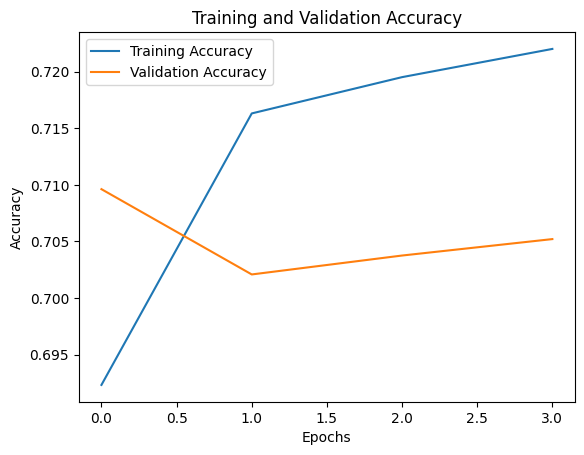

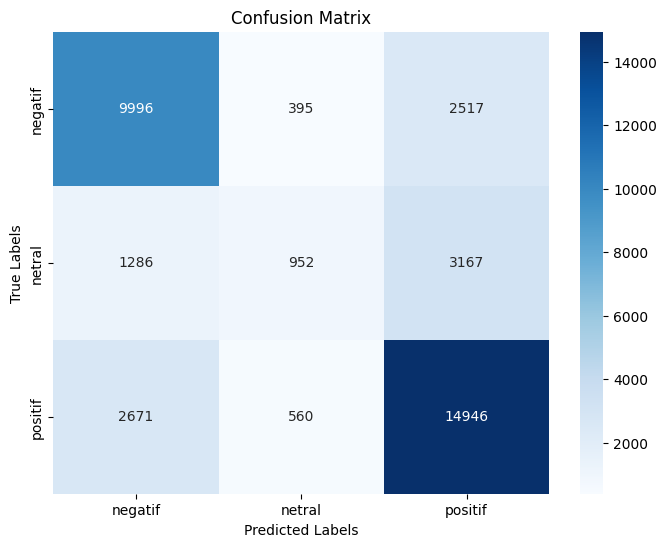

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model with test data
loss_ffnn, accuracy_ffnn = model_ffnn.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN:", accuracy_ffnn)

# Membuat prediksi menggunakan model
y_pred_prob = model_ffnn.predict(X_test_array)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Plot akurasi
plt.plot(history_ffnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model_ffnn.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        # Cetak informasi tentang bobot
        print(f"Layer Name: {layer.name}")
        print("Weight Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
        print("Weight Matrix:")
        print(weights[0])  # Bobot
        print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
        print("Bias Vector:")
        print(weights[1])    # Bias
        print("-----------------------------------")

Layer Name: dense
Weight Matrix Shape: (6327, 138)
Weight Matrix:
[[ 0.04054355 -0.0082841  -0.0401655  ... -0.00596239  0.00606325
  -0.03654682]
 [-0.11019313  0.11746386  0.07996754 ...  0.06715945 -0.05098226
   0.02691697]
 [-0.01403316 -0.03033521 -0.02931431 ...  0.00806471 -0.00726746
  -0.00563171]
 ...
 [ 0.01788112 -0.02282894 -0.02670178 ... -0.02008075  0.02567682
  -0.00243495]
 [-0.07647262  0.04124527  0.076402   ...  0.01442797 -0.03255448
   0.01334647]
 [-0.01886587  0.04353539  0.02709987 ... -0.01493414 -0.00209563
   0.01258914]]
Bias Vector Shape: (138,)
Bias Vector:
[ 2.3885884e-03 -5.5608753e-02 -4.3412626e-02 -2.7031410e-02
 -3.5946839e-02 -9.7367223e-03 -6.9194478e-03 -1.5802409e-02
 -4.4002058e-03 -3.7347139e-03 -4.2715464e-02 -1.2682975e-02
 -4.5222724e-03 -6.9572262e-02 -2.5625948e-02 -3.2816671e-02
 -3.6848519e-02 -2.6754724e-02 -2.1517044e-02 -1.4866671e-02
 -2.5435710e-02 -1.7296208e-02 -4.1473474e-02 -3.6774851e-02
 -1.2412918e-02 -3.0873019e-02 -4.077

MODEL FFNN 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_ffnn = '/content/drive/My Drive/models/modelFFNN2.h5'

# Define ModelCheckpoint callback to save the best model to Google Drive
checkpoint_ffnn = ModelCheckpoint(filepath_ffnn, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Define the model architecture
model_ffnn2 = Sequential()
model_ffnn2.add(Dense(493, input_shape=(X_train_array.shape[1],), activation= 'sigmoid'))
model_ffnn2.add(Dense(26, activation='sigmoid'))
model_ffnn2.add(Dense(3, activation='softmax'))
model_ffnn2.summary()

# Compile the model
model_ffnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with training data and validate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_ffnn2 = model_ffnn2.fit_generator(generator=train_generator,
                                          epochs=20,
                                          steps_per_epoch=len(train_generator),
                                          validation_data=validation_generator,
                                          validation_steps=len(validation_generator),
                                          callbacks=[checkpoint_ffnn, early_stopping])

# Evaluate the model with test data
loss_ffnn2, accuracy_ffnn2 = model_ffnn2.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN2:", accuracy_ffnn2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 493)               3119704   
                                                                 
 dense_3 (Dense)             (None, 26)                12844     
                                                                 
 dense_4 (Dense)             (None, 3)                 81        
                                                                 
Total params: 3132629 (11.95 MB)
Trainable params: 3132629 (11.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


<ipython-input-8-60f733829099>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_ffnn2 = model_ffnn2.fit_generator(generator=train_generator,


4557/4562 [============================>.] - ETA: 0s - loss: 0.7188 - accuracy: 0.6918
Epoch 1: val_accuracy improved from -inf to 0.70819, saving model to /content/drive/My Drive/models/modelFFNN2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4562/4562 [==============================] - 30s 6ms/step - loss: 0.7188 - accuracy: 0.6917 - val_loss: 0.6780 - val_accuracy: 0.7082
Epoch 2/20
4551/4562 [============================>.] - ETA: 0s - loss: 0.6580 - accuracy: 0.7169
Epoch 2: val_accuracy did not improve from 0.70819
4562/4562 [==============================] - 27s 6ms/step - loss: 0.6582 - accuracy: 0.7168 - val_loss: 0.6788 - val_accuracy: 0.7025
Epoch 3/20
4554/4562 [============================>.] - ETA: 0s - loss: 0.6457 - accuracy: 0.7224
Epoch 3: val_accuracy improved from 0.70819 to 0.70965, saving model to /content/drive/My Drive/models/modelFFNN2.h5
4562/4562 [==============================] - 29s 6ms/step - loss: 0.6459 - accuracy: 0.7224 - val_loss: 0.6640 - val_accuracy: 0.7096
Epoch 4/20
4560/4562 [============================>.] - ETA: 0s - loss: 0.6362 - accuracy: 0.7260
Epoch 4: val_accuracy improved from 0.70965 to 0.71406, saving model to /content/drive/My Drive/models/modelFFNN2.h5
4562/4562 [========

1141/1141 [==============================] - 3s 3ms/step - loss: 0.6643 - accuracy: 0.7181
Accuracy FFNN: 0.7180871367454529
1141/1141 [==============================] - 3s 2ms/step


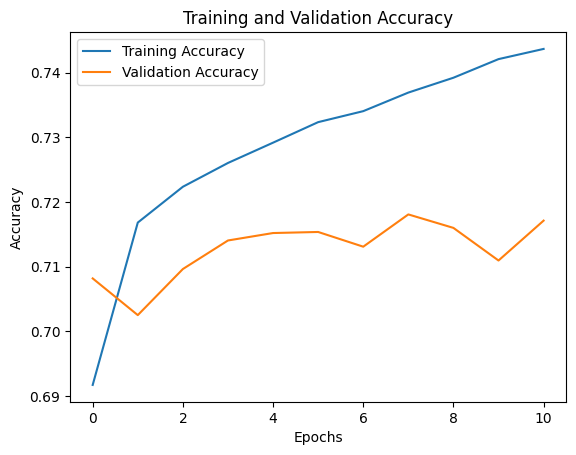

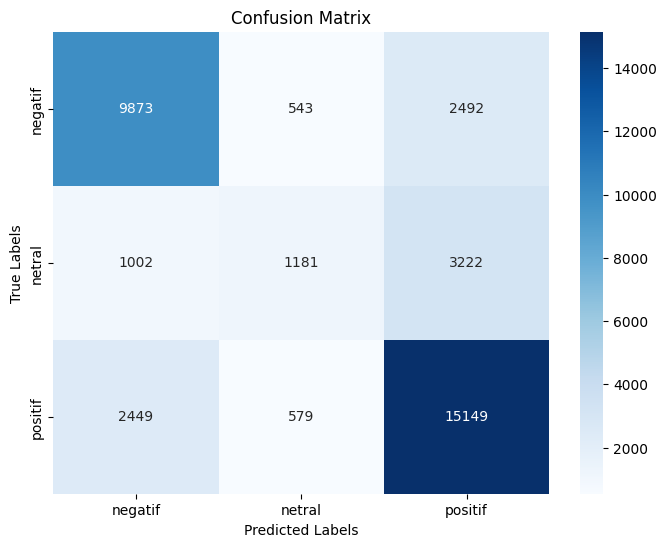

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model with test data
loss_ffnn, accuracy_ffnn = model_ffnn2.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN:", accuracy_ffnn)

# Membuat prediksi menggunakan model
y_pred_prob = model_ffnn2.predict(X_test_array)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Plot akurasi
plt.plot(history_ffnn2.history['accuracy'], label='Training Accuracy')
plt.plot(history_ffnn2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model_ffnn2.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        # Cetak informasi tentang bobot
        print(f"Layer Name: {layer.name}")
        print("Weight Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
        print("Weight Matrix:")
        print(weights[0])  # Bobot
        print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
        print("Bias Vector:")
        print(weights[1])    # Bias
        print("-----------------------------------")

Layer Name: dense_2
Weight Matrix Shape: (6327, 493)
Weight Matrix:
[[-0.23531038 -0.22073156 -0.22612585 ... -0.17058915  0.2733729
  -0.1743682 ]
 [-0.1678195  -0.35785687 -0.2172244  ... -0.00361902  0.24061583
  -0.04633991]
 [ 0.00085886 -0.02020158  0.01461179 ... -0.00473507  0.00815171
  -0.01180037]
 ...
 [-0.20237242 -0.20529069 -0.2572741  ... -0.09306476  0.253383
  -0.1452272 ]
 [ 0.00873226  0.01805113 -0.01886419 ... -0.00995518 -0.01552483
   0.0065721 ]
 [ 0.2050371   0.02345088  0.22609967 ... -0.22630693 -0.1841436
   0.1828633 ]]
Bias Vector Shape: (493,)
Bias Vector:
[-0.33626533 -0.19076335 -0.3295524  -0.2495092  -0.20635554 -0.29173434
 -0.16771603 -0.21102951 -0.28981957 -0.23311993  0.01762539 -0.30991027
 -0.22693565 -0.21529809 -0.30785987  0.02446609 -0.24573688 -0.34979576
  0.03099876 -0.30053207 -0.19950086 -0.2850757  -0.22486968 -0.22711772
 -0.3013294  -0.2735523  -0.2130785  -0.2656609  -0.22137417 -0.31515092
 -0.35718635 -0.24458934 -0.19728738 -0.

MODEL LSTM 1

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_lstm = '/content/drive/My Drive/models/modelLSTM.h5'

# Define ModelCheckpoint callback to save the best model
checkpoint_lstm = ModelCheckpoint(filepath_lstm, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batcmoh_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y

# Pra-pemrosesan data
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_tfidf = tfidf_vectorizer.fit_transform(data['remove_y_id'])

# Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentimen'], test_size=0.2, random_state=42)

# Ubah TF-IDF sparse matrix menjadi dense array
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

# Ubah dimensi input untuk LSTM
X_train_3d = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_3d = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Membuat instance dari DataGenerator untuk data pelatihan
train_generator = DataGenerator(X_train_3d, pd.get_dummies(y_train), batch_size)

# Membuat instance dari DataGenerator untuk data validasi
validation_generator = DataGenerator(X_test_3d, pd.get_dummies(y_test), batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(138, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2])))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.summary()

# Compile the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with training data and validate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_lstm = model_lstm.fit_generator(generator=train_generator,
                                        epochs=20,
                                        steps_per_epoch=len(train_generator),
                                        validation_data=validation_generator,
                                        validation_steps=len(validation_generator),
                                        callbacks=[checkpoint_lstm, early_stopping])

# Evaluate the model with test data
loss, accuracy = model_lstm.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Accuracy:", accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 138)               3568128   
                                                                 
 dense_1 (Dense)             (None, 3)                 417       
                                                                 
Total params: 3568545 (13.61 MB)
Trainable params: 3568545 (13.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


<ipython-input-12-7caa651e3ce3>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_lstm = model_lstm.fit_generator(generator=train_generator,


4562/4562 [==============================] - ETA: 0s - loss: 0.7483 - accuracy: 0.6805

KeyboardInterrupt: 


KeyboardInterrupt



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Membuat prediksi menggunakan model
y_pred_prob = model_lstm.predict(X_test_3d)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Plot akurasi
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Muat model yang telah disimpan
saved_model = load_model('/content/drive/My Drive/models/modelLSTM.h5')

# 1. Evaluasi model menggunakan data uji
evaluation = saved_model.evaluate(X_test_3d, pd.get_dummies(y_test))

# 2. Hitung prediksi pada data uji
y_pred = saved_model.predict(X_test_3d)
y_pred_classes = np.argmax(y_pred, axis=1)

# 3. Hitung matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 4. Tampilkan hasil evaluasi dan matriks konfusi
print("Evaluation Results:")
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
X_train.shape

(145960, 6325)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Memperoleh bobot awal yang diinisialisasi
initial_weights = model_lstm.get_weights()

# Menampilkan bobot awal yang diinisialisasi
print("Initial Weights:")
for i in range(len(initial_weights)):
    print(f"Layer {i+1} shape: {initial_weights[i].shape}")
    print(initial_weights[i])

# Menampilkan bobot setiap gate pada LSTM
lstm_layer = model_lstm.layers[0]  # Mendapatkan layer LSTM
lstm_weights = lstm_layer.get_weights()
print("\nLSTM Layer Weights:")
print(f"Forget Gate Weights: {lstm_weights[0].shape}")
print(lstm_weights[0])  # Bobot forget gate
print(f"Input Gate Weights: {lstm_weights[1].shape}")
print(lstm_weights[1])  # Bobot input gate
print(f"Output Gate Weights: {lstm_weights[2].shape}")
print(lstm_weights[2])  # Bobot output gate
print(f"Cell State Weights: {lstm_weights[3].shape}")
print(lstm_weights[3])  # Bobot cell state

# Dalam contoh ini, kita akan menggunakan data latih untuk memperoleh output
output = model_lstm.predict(X_train_3d)
print("\nOutput from the Model:")
print(output)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Ulasan = data['remove_y_id']

cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

MODEL LSTM 2

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_lstm = '/content/drive/My Drive/models/modelLSTM2.h5'

# Define ModelCheckpoint callback to save the best model
checkpoint_lstm = ModelCheckpoint(filepath_lstm, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y



In [ ]:
# Define the model architecture
model_lstm = Sequential()
model_lstm2.add(LSTM(493, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2]), return_sequences=True))
model_lstm2.add(LSTM(26))
model_lstm2.add(Dense(3, activation='softmax'))
model_lstm.summary()


# Compile the model
model_lstm2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with training data and validate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_lstm2 = model_lstm2.fit_generator(generator=train_generator,
                                        epochs=20,
                                        steps_per_epoch=len(train_generator),
                                        validation_data=validation_generator,
                                        validation_steps=len(validation_generator),
                                        callbacks=[checkpoint_lstm, early_stopping])

# Evaluate the model with test data
loss, accuracy = model_lstm2.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model
loss, accuracy = model_lstm2.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Membuat prediksi menggunakan model
y_pred_prob = model_lstm2.predict(X_test_3d)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Plot akurasi
plt.plot(history_lstm2.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Memperoleh bobot awal yang diinisialisasi
initial_weights = model_lstm2.get_weights()

# Menampilkan bobot awal yang diinisialisasi
print("Initial Weights:")
for i in range(len(initial_weights)):
    print(f"Layer {i+1} shape: {initial_weights[i].shape}")
    print(initial_weights[i])

# Menampilkan bobot setiap gate pada LSTM
lstm_layer = model_lstm2.layers[0]  # Mendapatkan layer LSTM
lstm_weights = lstm_layer.get_weights()
print("\nLSTM Layer Weights:")
print(f"Forget Gate Weights: {lstm_weights[0].shape}")
print(lstm_weights[0])  # Bobot forget gate
print(f"Input Gate Weights: {lstm_weights[1].shape}")
print(lstm_weights[1])  # Bobot input gate
print(f"Output Gate Weights: {lstm_weights[2].shape}")
print(lstm_weights[2])  # Bobot output gate
print(f"Cell State Weights: {lstm_weights[3].shape}")
print(lstm_weights[3])  # Bobot cell state

# Dalam contoh ini, kita akan menggunakan data latih untuk memperoleh output
output = model_lstm2.predict(X_train_3d)
print("\nOutput from the Model:")
print(output)